# Data Overview
Lagos state face increasing challenges from climate change-induced extreme weather, notably floods, which pose significant risks to residents, infrastructure, and economic stability. This report explores the methodology, findings, and prediction of floods in Lagos using data analysis techniques. Dataset used for this analysis is the lagos weather between 2002 and 2024.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_csv("Lagos weather data 2002_2024.csv")
data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Lagos,1/1/2002,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,...,NaN,NaN,NaN,2002-01-01T06:57:21,2002-01-01T18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999
1,Lagos,1/2/2002,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,...,NaN,NaN,NaN,2002-01-02T06:57:46,2002-01-02T18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999
2,Lagos,1/3/2002,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,...,NaN,NaN,NaN,2002-01-03T06:58:11,2002-01-03T18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999
3,Lagos,1/4/2002,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,...,NaN,NaN,NaN,2002-01-04T06:58:35,2002-01-04T18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999
4,Lagos,1/5/2002,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,...,NaN,NaN,NaN,2002-01-05T06:58:59,2002-01-05T18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,Lagos,6/29/2024,31.0,23.9,27.1,37.7,23.9,30.2,24.7,87.1,...,16.2,8.0,30.0,2024-06-29T06:35:20,2024-06-29T19:04:51,0.77,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"DNMM,remote,65201099999,VRJT5"
8216,Lagos,6/30/2024,31.2,25.0,27.8,39.5,25.0,31.8,25.2,86.2,...,18.8,8.0,30.0,2024-06-30T06:35:33,2024-06-30T19:05:01,0.80,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"DNMM,65201099999"
8217,Lagos,7/1/2024,32.0,25.0,27.9,40.5,25.0,31.5,24.9,84.6,...,20.3,8.0,30.0,2024-07-01T06:35:47,2024-07-01T19:05:10,0.84,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote"
8218,Lagos,7/2/2024,30.0,24.0,26.9,37.2,24.0,29.3,24.3,85.9,...,21.2,9.0,30.0,2024-07-02T06:36:01,2024-07-02T19:05:19,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote,VRJT5"


# Methodology
The analysis leveraged historical weather condition, including temperature, moonphase, and weather forecast. Python programming tools such as pandas for data manipulation and matplotlib for visualization were utilized. Key steps included data preprocessing to clean and format the data, exploratory data analysis to identify trends and patterns, and predictive modeling to forecast future flood occurrences.

In [5]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [6]:
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year
data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunrise,sunset,moonphase,conditions,description,icon,stations,day,month,year
0,Lagos,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,...,2002-01-01T06:57:21,2002-01-01T18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,1,1,2002
1,Lagos,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,...,2002-01-02T06:57:46,2002-01-02T18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,2,1,2002
2,Lagos,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,...,2002-01-03T06:58:11,2002-01-03T18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,3,1,2002
3,Lagos,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,...,2002-01-04T06:58:35,2002-01-04T18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,4,1,2002
4,Lagos,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,...,2002-01-05T06:58:59,2002-01-05T18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,5,1,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,Lagos,2024-06-29,31.0,23.9,27.1,37.7,23.9,30.2,24.7,87.1,...,2024-06-29T06:35:20,2024-06-29T19:04:51,0.77,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"DNMM,remote,65201099999,VRJT5",29,6,2024
8216,Lagos,2024-06-30,31.2,25.0,27.8,39.5,25.0,31.8,25.2,86.2,...,2024-06-30T06:35:33,2024-06-30T19:05:01,0.80,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"DNMM,65201099999",30,6,2024
8217,Lagos,2024-07-01,32.0,25.0,27.9,40.5,25.0,31.5,24.9,84.6,...,2024-07-01T06:35:47,2024-07-01T19:05:10,0.84,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote",1,7,2024
8218,Lagos,2024-07-02,30.0,24.0,26.9,37.2,24.0,29.3,24.3,85.9,...,2024-07-02T06:36:01,2024-07-02T19:05:19,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote,VRJT5",2,7,2024


# Exploratory Data Analysis (EDA)
EDA revealed significant insights into the relationship between rainfall patterns in Lagos, by filtering days with precipitation threshold higher than 50.0mm. Visualizations using matplotlib highlighted seasonal trends in precipitation and identified critical periods prone to flooding.

In [7]:
threshold = 50.0

#Filter data to find days with precipitation above threshold
data = data[data['precip'] > threshold].reset_index()

data.head()

,index,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,sunrise,sunset,moonphase,conditions,description,icon,stations,day,month,year
0,156,Lagos,2002-06-06,28.1,21.1,23.8,32.8,21.1,24.4,23.0,...,2002-06-06T06:30:37,2002-06-06T18:59:33,0.85,"Rain, Partially cloudy",Clearing in the afternoon with rain clearing l...,rain,65201099999,6,6,2002
1,160,Lagos,2002-06-10,30.1,23.1,25.6,36.5,23.1,26.6,24.5,...,2002-06-10T06:31:10,2002-06-10T19:00:31,0.98,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,65201099999,10,6,2002
2,174,Lagos,2002-06-24,26.1,23.4,25.1,26.1,23.4,25.1,24.7,...,2002-06-24T06:33:55,2002-06-24T19:03:42,0.50,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,65201099999,24,6,2002
3,192,Lagos,2002-07-12,29.1,22.6,25.9,33.7,22.6,27.2,24.2,...,2002-07-12T06:37:56,2002-07-12T19:06:06,0.07,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,65201099999,12,7,2002
4,196,Lagos,2002-07-16,25.6,24.1,25.0,25.6,24.1,25.0,24.6,...,2002-07-16T06:38:43,2002-07-16T19:06:12,0.22,"Rain, Partially cloudy",Becoming cloudy in the afternoon with rain.,rain,65201099999,16,7,2002


In [8]:
data.drop('index', axis=1, inplace=True)

In [12]:
new_data = data[['datetime', 'tempmax', 'tempmin', 'temp','precip','moonphase', 'precipprob', 'day', 'month', 'year']]
new_data.head

<bound method NDFrame.head of       datetime  tempmax  tempmin  temp  precip  moonphase  precipprob  day  \
0   2002-06-06     28.1     21.1  23.8    78.0       0.85       100.0    6   
1   2002-06-10     30.1     23.1  25.6    65.7       0.98       100.0   10   
2   2002-06-24     26.1     23.4  25.1    52.9       0.50       100.0   24   
3   2002-07-12     29.1     22.6  25.9    72.1       0.07       100.0   12   
4   2002-07-16     25.6     24.1  25.0    75.9       0.22       100.0   16   
..         ...      ...      ...   ...     ...        ...         ...  ...   
160 2023-11-07     32.0     23.0  26.7    53.0       0.81       100.0    7   
161 2024-05-22     31.0     23.0  27.8    53.0       0.46       100.0   22   
162 2024-05-25     30.1     23.0  26.4    61.0       0.57       100.0   25   
163 2024-06-26     31.0     23.0  26.9    84.0       0.66       100.0   26   
164 2024-07-03     27.1     24.0  25.4    52.1       0.91       100.0    3   

     month  year  
0        6  20

In [13]:
data_men = new_data.groupby('year')['precip'].mean().reset_index()
data_men

,year,precip
0,2002,68.400000
1,2003,59.950000
2,2004,89.900000
3,2005,177.666667
4,2006,162.929412
5,2007,93.785714
6,2008,69.366667
7,2009,95.412500
8,2010,85.487500
9,2011,145.800000


Precipitation: From the analysis, it can be observed that that year 2005 has the highest average precipitation of 177.67, and 2011 with 145.8. Giving that flood occurred during this year.

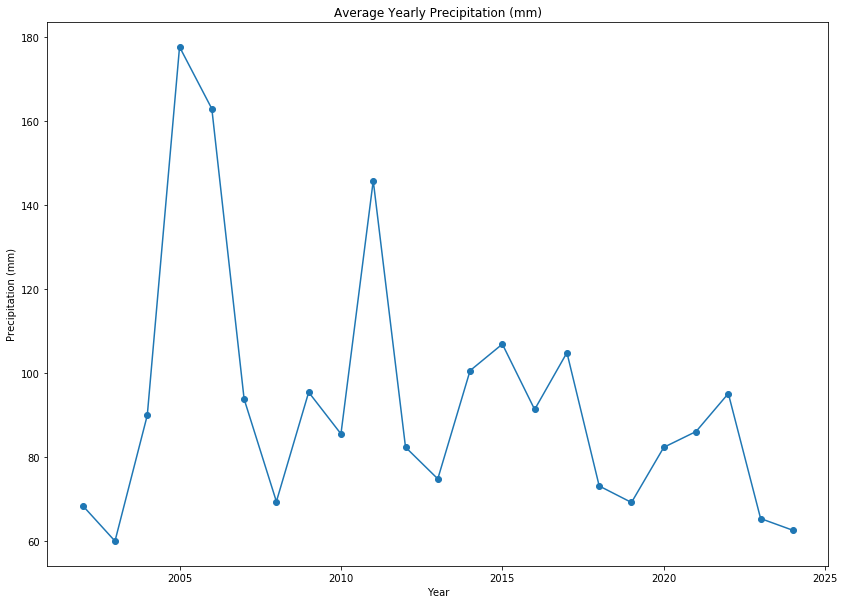

In [14]:
plt.figure(figsize=(14, 10))  # This sets the width to 1000px and height to 700px
plt.plot(data_men['year'], data_men['precip'], marker='o')

# Add titles and labels
plt.title('Average Yearly Precipitation (mm)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')

# Show the plot
plt.show()

In [15]:
day= data.groupby('day')['precip'].mean().reset_index()
day

,day,precip
0,1,69.950000
1,2,65.300000
2,3,82.333333
3,4,93.660000
4,5,114.175000
5,6,72.000000
6,7,72.090909
7,8,98.083333
8,9,78.785714
9,10,129.300000


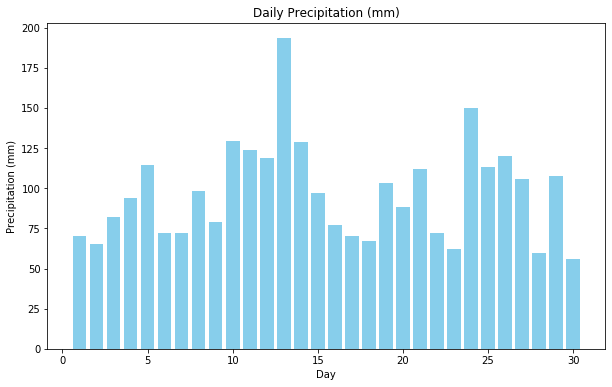

In [16]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(day['day'], day['precip'], color='skyblue')

# Add titles and labels
plt.title('Daily Precipitation (mm)')
plt.xlabel('Day')
plt.ylabel('Precipitation (mm)')

# Display the plot
plt.show()

In [17]:
month = data.groupby('month')['precip'].mean().reset_index()
month

,month,precip
0,1,64.150000
1,2,140.250000
2,3,139.128571
3,4,98.157143
4,5,102.352000
5,6,90.084615
6,7,95.410345
7,8,120.971429
8,9,95.866667
9,10,102.712500


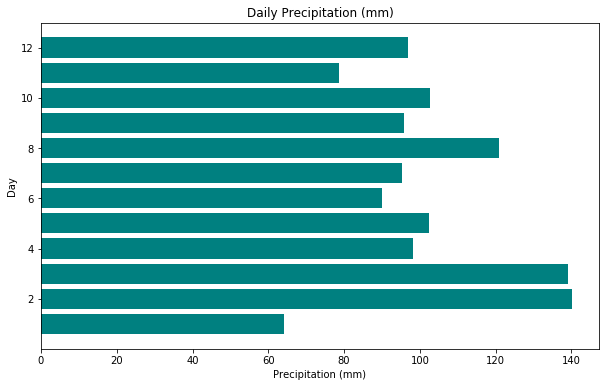

In [19]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.barh(month['month'], month['precip'], color='teal')

# Add titles and labels
plt.title('Daily Precipitation (mm)')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Day')

# Display the plot
plt.show()


In [23]:
data.to_csv(r'C:\Users\victoria\Desktop\HNG_INTERNSHIP\HNG\new_lagos_weather.csv')

In [24]:
avg_day = data.groupby('day')['precip'].mean().reset_index()
avg_day

,day,precip
0,1,69.950000
1,2,65.300000
2,3,82.333333
3,4,93.660000
4,5,114.175000
5,6,72.000000
6,7,72.090909
7,8,98.083333
8,9,78.785714
9,10,129.300000


In [26]:
data.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'day', 'month', 'year'],
      dtype='object')

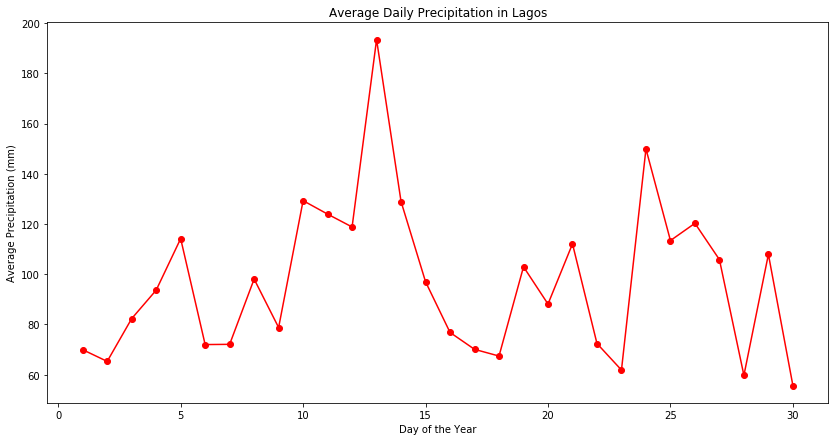

In [30]:
plt.figure(figsize=(14, 7))  # Setting the figure size
plt.plot(avg_day['day'], avg_day['precip'], marker='o', linestyle='-', color='red')

# Add titles and labels
plt.title('Average Daily Precipitation in Lagos')
plt.xlabel('Day of the Year')
plt.ylabel('Average Precipitation (mm)')

# Display the plot
plt.show()


In [31]:
avg_moon = data.groupby('moonphase')['precip'].mean().reset_index()
avg_moon.head

<bound method NDFrame.head of     moonphase      precip
0        0.00  141.766667
1        0.02  145.000000
2        0.03  165.500000
3        0.05   56.250000
4        0.07   72.100000
..        ...         ...
68       0.94   99.000000
69       0.95   51.000000
70       0.96   55.400000
71       0.97   99.100000
72       0.98   65.700000

[73 rows x 2 columns]>

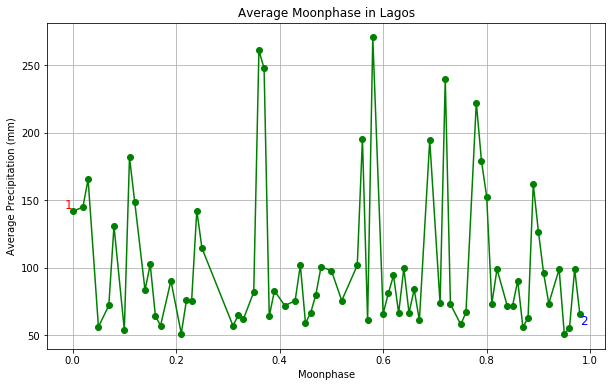

In [33]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(avg_moon['moonphase'], avg_moon['precip'], marker='o', linestyle='-', color='green')

# Adding titles and labels
plt.title('Average Moonphase in Lagos')
plt.xlabel('Moonphase')
plt.ylabel('Average Precipitation (mm)')

plt.text(avg_moon['moonphase'].iloc[0], avg_moon['precip'].iloc[0], '1', fontsize=12, ha='right', va='bottom', color='red')
plt.text(avg_moon['moonphase'].iloc[-1], avg_moon['precip'].iloc[-1], '2', fontsize=12, ha='left', va='top', color='blue')

# Display the plot
plt.grid(True)  # Optionally add grid lines
plt.show()


In [34]:
label_encoder = LabelEncoder()

data['condition_encoded'] = label_encoder.fit_transform(data['conditions'].astype(str))
data['description_encoded'] = label_encoder.fit_transform(data['description'].astype(str))

# Feature Engineering: Creating a target variable 'flood' based on high precipitation days 
data['flood'] = data['precip'] > threshold

#Seelecting features for the model
features = ['tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'precipprob', 'precipcover', 'condition_encoded', 'description_encoded', 'windspeed', 'sealevelpressure','month', 'day']

X =data[features]
Y = data['flood']


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Initial and train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = rf_model.predict(X_test)

# Evaluate the model
classification_rep = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)


classification_rep, conf_matrix

('              precision    recall  f1-score   support\n\n        True       1.00      1.00      1.00        33\n\n    accuracy                           1.00        33\n   macro avg       1.00      1.00      1.00        33\nweighted avg       1.00      1.00      1.00        33\n',
 array([[33]], dtype=int64))

In [35]:
from datetime import timedelta

In [37]:
last_date = data['datetime'].iloc[-1]
next_flood_date = None

for i in range(1, 365):  # Check the next 365 days (1 year)
    future_date = last_date + timedelta(days=i)
    future_data = {
        'tempmax': data['tempmax'].mean(),  # Use mean values of the features
        'tempmin': data['tempmin'].mean(),
        'temp': data['temp'].mean(),
        'humidity': data['humidity'].mean(),
        'precip': data['precip'].mean(),
        'precipprob': data['precipprob'].mean(),
        'precipcover': data['precipcover'].mean(),
        'condition_encoded': data['condition_encoded'].mode()[0],  # Use mode for categorical data
        'description_encoded': data['description_encoded'].mode()[0],
        'windspeed': data['windspeed'].mean(),
        'sealevelpressure': data['sealevelpressure'].mean(),
        'month': future_date.month,
        'day': future_date.day
    }
    future_df = pd.DataFrame([future_data])
    future_pred = rf_model.predict(future_df)[0]
    if future_pred == 1 and future_date > pd.Timestamp.today():
        next_flood_date = future_date
        break

if next_flood_date:
    print(f"The predicted flood date in lagos is {next_flood_date.strftime('%Y-%m-%d')}")
else:
    print("No flood predicted.")

The predicted flood date in lagos is 2024-07-07
